# ch 12_4. word cloud

이전 챕터에서 2022년 한국 야구 데이터 셋을 토큰화 했습니다. 이번 챕터에서는 가장 기본적인 자연어 데이터 시각화 기법인 워드 클라우드에 대해서 알아보겠습니다. 워드 클라우드는 특정 단어와 함께 등장한 단어의 빈도 수를 집계해서, 어떤 단어가 연관되어 있는지를 시각적으로 표현하는 기법입니다.

In [1]:
!pip install wordcloud

## 데이터 준비
우리가 만들어보고 싶은 건 특정 선수 이름이 주어지면, 그 선수와 함께 언급되는 단어들을 시각적으로 보여주는 것입니다. 이를 위해서 먼저 토큰화 한 뉴스 기사 데이터에서 특정 선수가 언급되면, 함께 언급된 단어들의 빈도수를 세어 딕셔너리 형태로 만들어보겠습니다. 

먼저 기사에 선수 이름이 포함되었는지 여부를 판단하기 위해 크롤러 시간에 짰던 코드를 재사용합니다.

In [3]:
import csv

def load_players():
    players = []
    with open("./data/baseball_players.csv") as fr:
        reader = csv.reader(fr)
        next(reader)
        for row in reader:
            team, pitcher_str, catcher_str, infielder_str, outfielder_str = row
            pitchers = pitcher_str.split("\n")
            catchers = catcher_str.split("\n")
            infielders = infielder_str.split("\n")
            outfielders = outfielder_str.split("\n")
            players.extend(pitchers + catchers + infielders + outfielders)
    players = set(players)
    return players

In [4]:
players = load_players() 

In [5]:
print(players)

{'송찬의', '곽빈', '이용규', '양현', '김진성', '장진혁', '노시환', '이원석', '한석현', '김대우', '김민', '김현수', '박건우', '이시원', '박성한', '박치국', '김성윤', '우규민', '켈리', '강승호', '김한별', '윤대경', '김진욱', '이준호', '안치홍', '최원준', '김지찬', '전민재', '하준영', '고영표', '변우혁', '정우람', '오승환', '한승주', '앤더슨', '강민호', '장성우', '양찬열', '전준우', '로하스', '양현종', '하영민', '윤정현', '홍현빈', '박찬호', '구자욱', '조형우', '황대인', '이창진', '김동헌', '페디', '서호철', '장민재', '이정후', '채은성', '김동주', '윤형준', '김규성', '이병규', '김범수', '윤영철', '김태훈', '한유섬', '문동주', '서건창', '문용익', '이선우', '신헌민', '김성현', '김태현', '김주원', '박세혁', '반즈', '김선빈', '강백호', '김재상', '김태진', '최경모', '김유성', '정수빈', '양석환', '플럿코', '김명신', '김건웅', '한동희', '이재현', '류지혁', '요키시', '김기중', '김준완', '김민우', '이상민', '안중열', '고종욱', '전상현', '박민호', '백정현', '이우성', '조민석', '김재웅', '최재훈', '조민성', '고승민', '이성규', '윤명준', '정철원', '진해수', '최형우', '이용준', '김태군', '김민식', '김기훈', '김대유', '조수행', '정보근', '강진성', '오윤석', '박세웅', '이유찬', '문성주', '고효준', '김윤식', '페냐', '임정호', '김영웅', '최승용', '허경민', '신민혁', '임병욱', '박해민', '김준형', '최상민', '김정민', '정우영', '문현빈', '최원태', '이진영', '후라도', '장승현', '이승현', '피렐라', '러셀', '최지민', '메디나',

토큰화한 데이터 셋을 순회하며 특정 기사에 선수 이름이 포함되어 있을 경우, 함께 언급된 일반 명사, 고유 명사의 빈도수를 세어서 딕셔너리에 추가합니다.

In [13]:
import pandas as pd
from tqdm import tqdm

In [14]:
df = pd.read_csv("./data/baseball_tokenized.csv")

In [15]:
df

,url,datetime_str,title,content,title_tokens,content_tokens
0,https://sports.news.naver.com/news?oid=117&aid...,20220101,"KBO 역대급 외인타자, 끝내 10개 구단 외면 받고 사라지나",KBO 리그 10개 구단의 외국인선수 구성도 막바지를 향하고 있다. 이미 대부분 구...,"[('KBO', 'NNP'), ('역대', 'NNG'), ('급', 'NNG'), ...","[('KBO 리그', 'NNP'), ('10', 'SN'), ('개', 'NNB')..."
1,https://sports.news.naver.com/news?oid=117&aid...,20220101,'불혹의 거인’ 침묵이 심상찮다...'꿈'이 영원히 사라지고 있는데...,롯데 자이언츠의 거인 이대호(40)의 꿈이 무너져가고 있다. 이대호가 새해 40세 ...,"[(""'"", 'SS'), ('불혹', 'NNG'), ('의', 'JKG'), ('거...","[('롯데', 'NNP'), ('자이언츠', 'NNP'), ('의', 'JKG'),..."
2,https://sports.news.naver.com/news?oid=410&aid...,20220101,"'롯데맨'으로 새해 맞은 문경찬 ""불펜 경쟁서 살아남겠다"" [MK인터뷰]",“어쩌다 보니 새해맞이 서프라이즈가 됐네요.”2021년의 마지막 날 오후. 문경찬(...,"[(""'"", 'SS'), ('롯데', 'NNP'), ('맨', 'NNP'), (""'...","[('“', 'SS'), ('어쩌다', 'MAG'), ('보니', 'NNP'), (..."
3,https://sports.news.naver.com/news?oid=108&aid...,20220101,"'유일한 FA 미계약자' 정훈 결국 해 넘겼다, 롯데 ""이견 좁혀가는 중""",이번 겨울 FA(프리에이전트) 시장에선 15명 중 14명이 소속팀을 찾았다. 이제 ...,"[(""'"", 'SS'), ('유일한', 'NNP'), ('FA', 'SL'), ('...","[('이번', 'NNG'), ('겨울', 'NNG'), ('FA', 'SL'), (..."
4,https://sports.news.naver.com/news?oid=117&aid...,20220101,"""KIA 5강 이상, SSG 알찬 보강, NC 구창모 오면…"" 허구연 위원 픽, 2...","""KIA는 5강 이상 달성해야 하는 전력이다.""2022년이 밝았다. KBO리그 10...","[('""', 'SS'), ('KIA', 'NNP'), ('5', 'SN'), ('강...","[('""', 'SS'), ('KIA', 'NNP'), ('는', 'JX'), ('5..."
...,...,...,...,...,...,...
102477,https://sports.news.naver.com/news?oid=410&aid...,20221231,"‘위기의 남자’ 김동엽, 박진만 감독은 대행 시절 “쓰지 않겠다”고 했다",“내가 감독 대행을 하는 동안에는 볼 수 없을 것이다.”박진만 삼성 감독이 대행 시...,"[('‘', 'SS'), ('위기의 남자', 'NNP'), ('’', 'SS'), ...","[('“', 'SS'), ('내', 'NP'), ('가', 'JKS'), ('감독 ..."
102478,https://sports.news.naver.com/news?oid=139&aid...,20221231,'21년 대타 타율 .371' 결국 은퇴를 선언한 前 두산 포수 최용제,김경현 기자= 두산 베어스로부터 방출 통보를 받았던 최용제가 소속팀을 구하지 못하고...,"[(""'"", 'SS'), ('21년', 'NNP'), ('대타', 'NNP'), (...","[('김경', 'NNP'), ('현', 'NNP'), ('기자', 'NNG'), (..."
102479,https://sports.news.naver.com/news?oid=117&aid...,20221231,"“스트레스 받는 성격 아닌데…” KIA 캡틴의 진심, 이적생 3루수에게 고맙다",“스트레스를 받는 성격이 아니고 털고 넘어가는 스타일인데…”KIA 베테랑 내야수 김...,"[('“', 'SS'), ('스트레스', 'NNP'), ('받', 'VV'), ('...","[('“', 'SS'), ('스트레스', 'NNP'), ('를', 'JKO'), (..."
102480,https://sports.news.naver.com/news?oid=076&aid...,20221231,'호주에서도 못 잡으면…' 드래프트 전체 1순위 국대 출신 좌완 파이어볼러 깊어지는 고민,롯데 좌완 김진욱(20)의 고심이 깊어지고 있다. 이병규 감독이 이끄는 질롱 코리아...,"[(""'"", 'SS'), ('호주', 'NNP'), ('에서', 'JKB'), ('...","[('롯데', 'NNP'), ('좌완', 'NNG'), ('김진욱', 'NNP'),..."


### 결측치 제거

In [16]:
df.isnull().sum()

url                0
datetime_str       0
title              0
content            0
title_tokens       3
content_tokens    13
dtype: int64

In [17]:
df = df.dropna()

### 명사 추출
제목과 본문을 토큰화한 문자열에서 일반 명사와 고유 명사만 추출하여 데이터 프레임의 컬럼으로 추가합니다.

In [18]:
def extract_nouns(tokens_str):
    tokens = eval(tokens_str)
    nouns = [text for text, tag in tokens if tag in ("NNP", "NNG")]
    return nouns

In [19]:
tqdm.pandas()
df["title_nouns"] = df["title_tokens"].progress_apply(extract_nouns)
df["content_nouns"] = df["content_tokens"].progress_apply(extract_nouns)

100%|██████████████████████████████████| 102466/102466 [00:05<00:00, 18874.70it/s]
/var/folders/wx/2vw1xwz972zdxff5h8gzrml00000gn/T/ipykernel_11002/2839336753.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["title_nouns"] = df["title_tokens"].progress_apply(extract_nouns)
100%|████████████████████████████████████| 102466/102466 [02:52<00:00, 595.44it/s]
/var/folders/wx/2vw1xwz972zdxff5h8gzrml00000gn/T/ipykernel_11002/2839336753.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["content_nouns"] =

### 동시 출현 빈도 집계
특정 선수의 이름과 함께 등장한 명사를 defaultdict와 Counter를 이용해서 집계합니다.

In [24]:
from collections import Counter, defaultdict
from tqdm import tqdm

word_count_dict = defaultdict(Counter)

def count_words(nouns):
    player_name_nouns = set(nouns).intersection(players)
    for player_name in player_name_nouns:
        c = Counter([x for x in nouns if x != player_name])
        word_count_dict[player_name] += c

In [25]:
content_nouns_series = df["content_nouns"]

for content_nouns in tqdm(content_nouns_series):
    count_words(content_nouns)

100%|████████████████████████████████████| 102466/102466 [02:40<00:00, 638.76it/s]


In [27]:
word_count_dict["김광현"].most_common(10)

[('SSG', 36038),
 ('경기', 28208),
 ('시즌', 25161),
 ('팀', 16658),
 ('승', 16535),
 ('선수', 15250),
 ('투수', 15146),
 ('리그', 14409),
 ('이닝', 14335),
 ('선발', 13918)]

## word cloud 시각화

함께 등장하는 단어를 세었으니 이제 워드 클라우드를 만들어보겠습니다. 폰트 적용 부분은 아래 가이드를 읽어보고, 본인의 환경에 맞게 코드를 수정하면 됩니다.

- [윈도우 폰트 적용 가이드](https://doitgrow.com/34#:~:text=%EC%9B%8C%EB%93%9C%ED%81%B4%EB%9D%BC%EC%9A%B0%EB%93%9C%EC%97%90%20%EC%82%AC%EC%9A%A9%ED%95%A0%20%ED%8F%B0%ED%8A%B8,%EA%B2%B0%EA%B3%BC%EB%A5%BC%20%ED%99%95%EC%9D%B8%ED%95%A0%20%EC%88%98%20%EC%9E%88%EC%8A%B5%EB%8B%88%EB%8B%A4.)
- [맥 폰트 적용 가이드](https://business-analytics.tistory.com/3)

In [33]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

def visualize_wordcloud(word_count, color):
    wordcloud = WordCloud(
        font_path="/Library/Fonts/NanumGothic.otf",
        width=1000, 
        height=400, 
        scale=2.0, 
        background_color='white', 
        colormap=color,
        max_font_size=150
    ).generate_from_frequencies(word_count)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud)

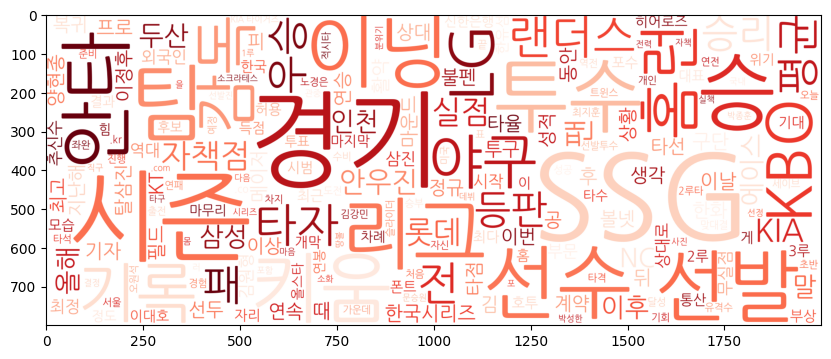

In [34]:
visualize_wordcloud(word_count_dict["김광현"], "Reds")

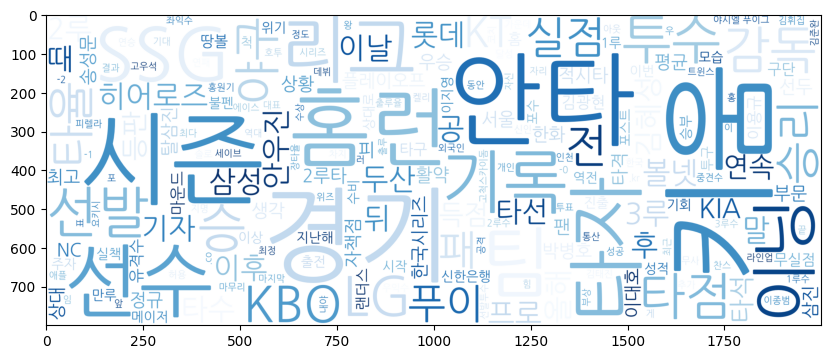

In [35]:
visualize_wordcloud(word_count_dict["이정후"], "Blues")

## 정리
이번 챕터에서는 자연어 데이터 시각화 하면 가장 먼저 떠오르는 워드 클라우드를 만들어 보았습니다. 사실 워드 클라우드는 직관적으로 의미를 전달하는 것이 어려워서 잘 사용되지 않습니다. 이어지는 챕터들에서 더 정교화 된 자연어처리 알고리즘들을 배워보겠습니다.